In [1]:
# For matrix calculation
import numpy as np;
import pandas as pd;

# For visualization
import seaborn as sns;
import matplotlib.pyplot as plt;

# For pre-treatment
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder;

# To select the model that performs and generalizes best
from sklearn.model_selection import train_test_split, cross_val_score, KFold;

# For modelling
from sklearn.linear_model import LinearRegression, Lasso, Ridge;
from sklearn.neighbors import KNeighborsRegressor;
from sklearn.tree import DecisionTreeRegressor;

# For save and load model
from joblib import dump, load;

# For the evaluation of models
from sklearn.metrics import mean_squared_error;

from sklearn.utils import shuffle;
import warnings;

sns.set_style('darkgrid');
pd.set_option('max_column', None);
warnings.filterwarnings('ignore');

RANDOM_STATE = 13;

# Definition of the problem

#Attribute information :

This problem has the following entries:
1. Frequency, in Hertzs(Freq).
2. Angle of attack, in degrees(Ang).
3. Length of the string, in meters(Long).
4. Speed of free flow, in metres per second(Velocity).
5. Thickness of the suction side displacement, in metres.(Thickness)

    The only output is :
6. Sound pressure level, in decibels.

# Load data

In [2]:
noise = pd.read_csv('C:\\Users\\stella\\Desktop\\deploiement\\NASA_airfoil_self_noise.csv', header = 0, sep = ",")
noise = shuffle(noise, random_state=RANDOM_STATE);
noise

,Frequency,AngleAttack,ChordLength,FreeStreamVelocity,SuctionSide,Sound
1450,1600,12.3,0.1016,39.6,0.040827,117.875
470,800,0.0,0.1524,55.5,0.001727,126.713
5,2500,0.0,0.3048,71.3,0.002663,125.571
512,800,2.7,0.1524,71.3,0.002439,127.394
1342,6300,3.3,0.1016,31.7,0.002514,120.702
...,...,...,...,...,...,...
866,2500,11.2,0.0508,39.6,0.015048,122.170
742,2000,0.0,0.0508,55.5,0.000762,131.456
74,5000,1.5,0.3048,71.3,0.003367,119.632
176,400,4.0,0.3048,39.6,0.005796,128.633


In [3]:
noise.shape

(1503, 6)

In [4]:
# let's separate the dataset
train1 = noise[:1300].reset_index(drop=True);
prod  = noise[1300:].reset_index(drop=True);

In [5]:
train1.shape

(1300, 6)

In [6]:
prod.shape

(203, 6)

In [7]:
main_cols = noise.columns.difference(['Sound']); 

In [8]:
main_cols

Index(['AngleAttack', 'ChordLength', 'FreeStreamVelocity', 'Frequency',
       'SuctionSide'],
      dtype='object')

## 2. UNDERSTANDING DATA: descriptive and inferential statistics, data analysis, hypothesis testing

In [9]:
#interroger s'il existe des valeurs manquantes
noise.isna().sum().any()

False

In [10]:
#doublons
noise[noise.duplicated(keep=False)].shape

(0, 6)

###  Univariate Exploratory Analysis

,count,mean,std,min,25%,50%,75%,max
Sound,1300.0,124.88315,6.881526,103.38,120.192,125.84,129.974,140.987


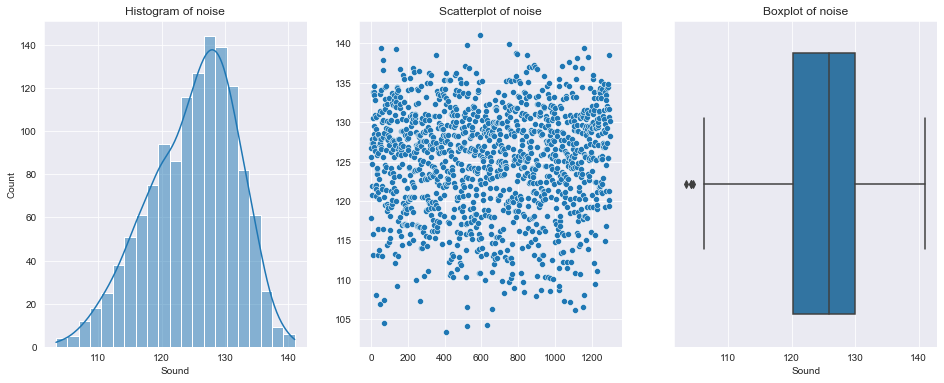

In [11]:
# Target distibution
plt.figure(figsize=(16, 6));
plt.subplot(131);
sns.histplot(train1['Sound'], kde=True);
plt.title('Histogram of noise');

plt.subplot(132);
sns.scatterplot(train1.index.values, train1['Sound'].values)
plt.title('Scatterplot of noise');

plt.subplot(133);
sns.boxplot(train1['Sound']);
plt.title('Boxplot of noise');

train1[['Sound']].describe().T

In [12]:
#descriptive statistic
train1.describe()

,Frequency,AngleAttack,ChordLength,FreeStreamVelocity,SuctionSide,Sound
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,2861.176923,6.813000,0.136046,51.001692,0.011162,124.883150
std,3121.686628,5.876375,0.093649,15.572818,0.013152,6.881526
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002631,120.192000
50%,1600.000000,5.400000,0.101600,47.550000,0.004957,125.840000
75%,4000.000000,9.900000,0.228600,71.300000,0.016104,129.974000
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


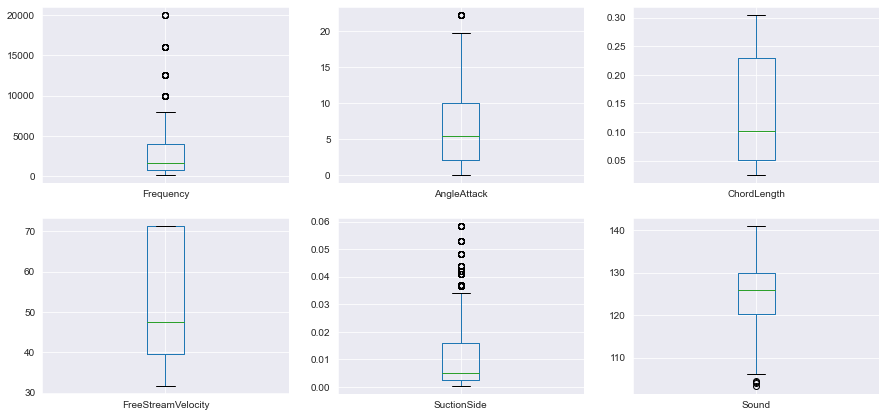

In [13]:
# Boxplot
train1.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(15, 11));
plt.show()

In [14]:
# Outliers
noise[(noise.Sound>105)]


,Frequency,AngleAttack,ChordLength,FreeStreamVelocity,SuctionSide,Sound
1450,1600,12.3,0.1016,39.6,0.040827,117.875
470,800,0.0,0.1524,55.5,0.001727,126.713
5,2500,0.0,0.3048,71.3,0.002663,125.571
512,800,2.7,0.1524,71.3,0.002439,127.394
1342,6300,3.3,0.1016,31.7,0.002514,120.702
...,...,...,...,...,...,...
866,2500,11.2,0.0508,39.6,0.015048,122.170
742,2000,0.0,0.0508,55.5,0.000762,131.456
74,5000,1.5,0.3048,71.3,0.003367,119.632
176,400,4.0,0.3048,39.6,0.005796,128.633


In [15]:
# Outliers
train1[(train1.Frequency>5000) &(train1.Sound<105) ]

,Frequency,AngleAttack,ChordLength,FreeStreamVelocity,SuctionSide,Sound
405,6300,12.6,0.1524,39.6,0.058411,103.380
630,6300,15.6,0.1016,39.6,0.052849,104.204


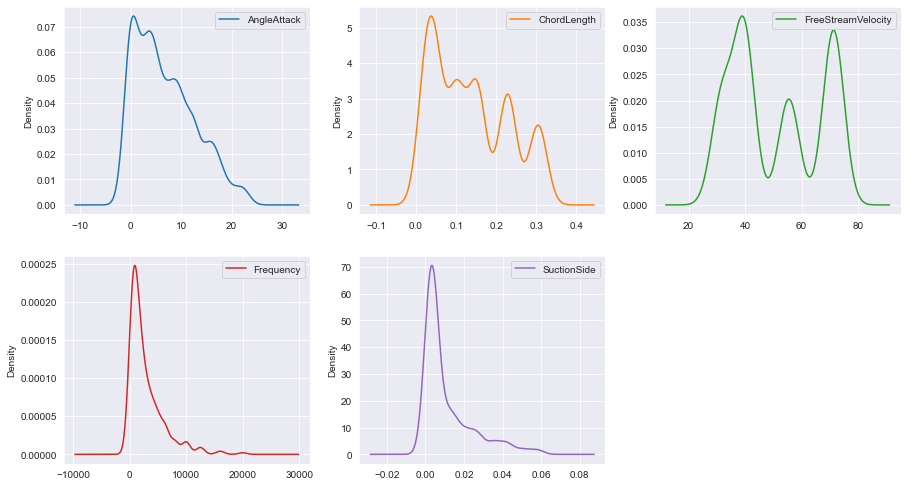

In [16]:
#density 
train1[main_cols].plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False, legend=True, figsize=(15, 13));
plt.show()

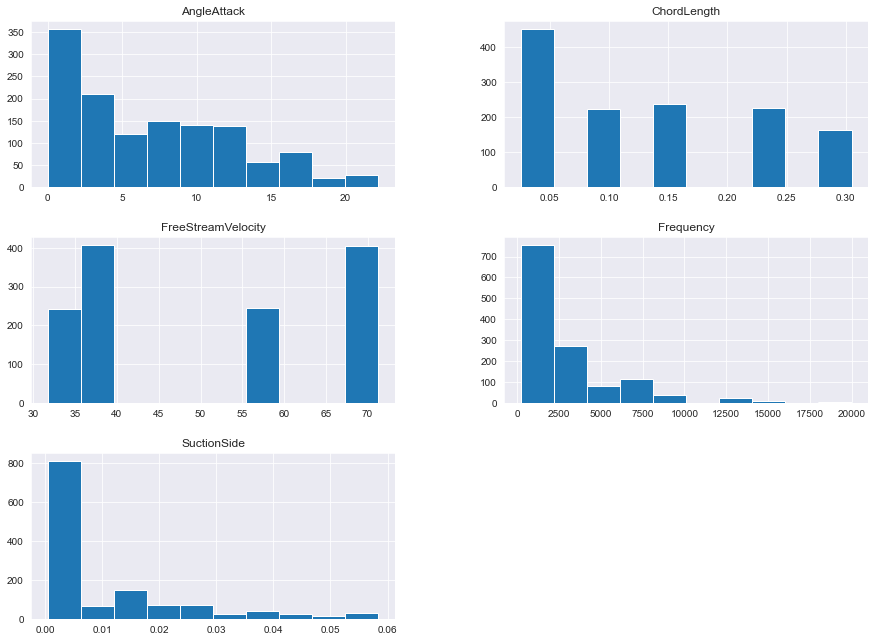

In [17]:
# Histogramme
train1[main_cols].hist(figsize=(15, 11));
plt.show()

** Thick: it can be seen that there are

###  Bivariate Exploratory Analysis

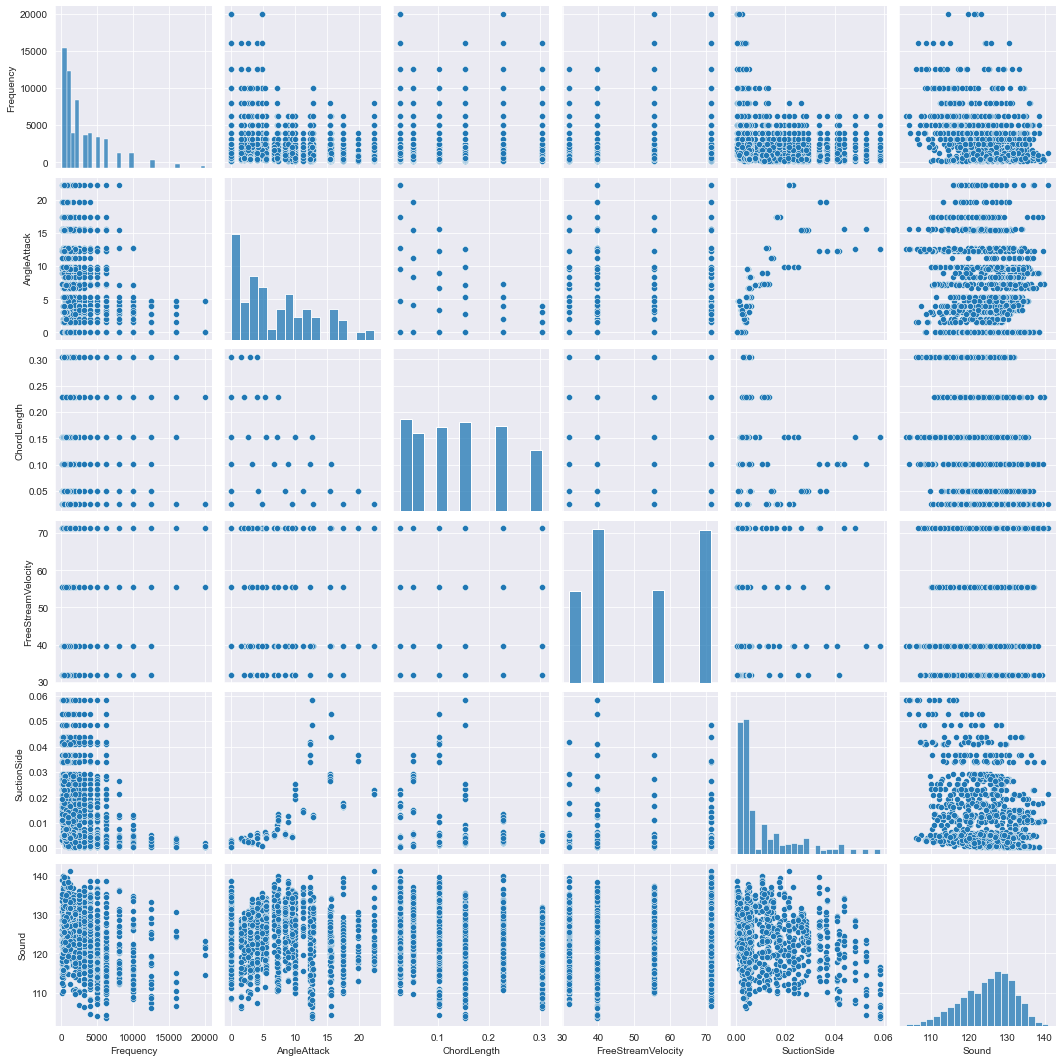

In [18]:
sns.pairplot(train1)

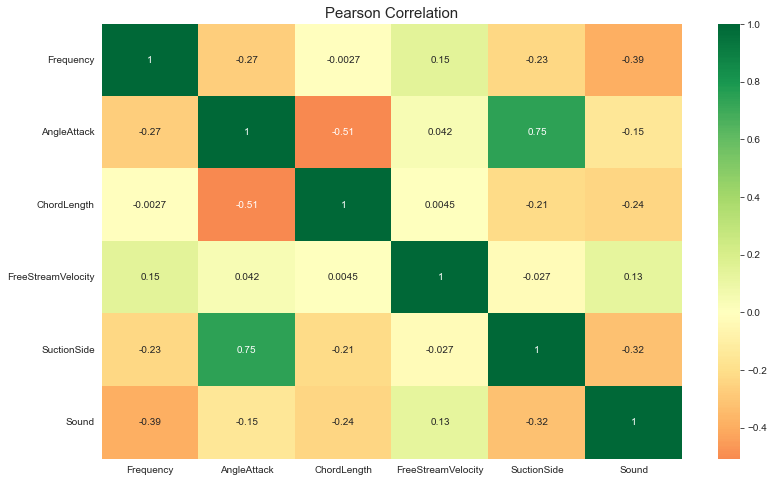

In [19]:
# Correlation matrix
corr = train1.corr(method='pearson');
plt.figure(figsize = (13, 8));
sns.heatmap(corr, cmap='RdYlGn', annot=True, center=0);
plt.title('Pearson Correlation', fontsize=15);
plt.show()

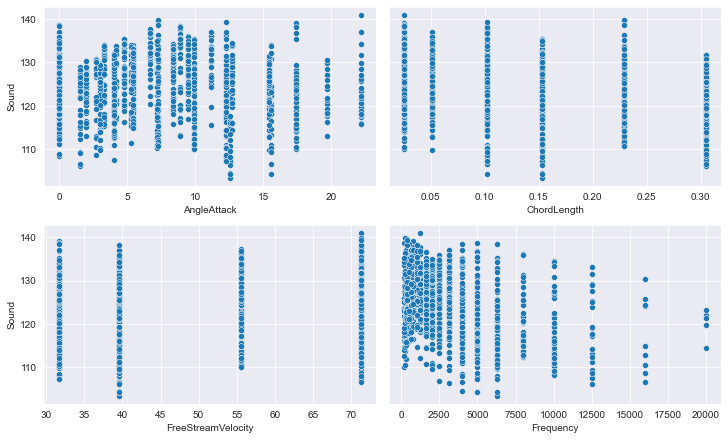

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), sharey=True, constrained_layout=True);
axes = axes.flatten();

for col, ax in zip(main_cols, axes):
    sns.scatterplot(train1[col], train1['Sound'],ax=ax);
    ax.set_ylabel('Sound');
    ax.set_xlabel(col);

## 3. PREPARE DATA: clean and transform data, select features, engineer functionality

In [85]:
# Look at unique values
train1['AngleAttack'].unique()

array([12.3,  0. ,  2.7,  3.3, 15.4,  9.5,  5.3, 11.2,  9.9,  7.3,  7.2,
       12.6,  8.9,  6.7,  4. , 15.6, 17.4, 12.7,  2. ,  4.8,  5.4,  3. ,
       19.7,  4.2,  8.4, 22.2,  1.5])

# Model training

In [13]:
# Select main columns to be used in training
X = train1[main_cols];
y = train1['Sound'];

# K-Fold
kfold = KFold(n_splits=12, shuffle=True, random_state=RANDOM_STATE);

In [87]:
main_cols

Index(['AngleAttack', 'ChordLength', 'FreeStreamVelocity', 'Frequency',
       'SuctionSide'],
      dtype='object')

In [88]:
# Spot-check selection
models = [];
models.append(('LR', LinearRegression()));
models.append(('KNN', KNeighborsRegressor(n_neighbors=5)));
models.append(('DT', DecisionTreeRegressor(max_depth=5, random_state=RANDOM_STATE)));

results = [];  # Store score of models
names   = [];  # Store name of models

In [25]:
# Fit
for name, model in models:
    
    scores = []; # Store score of folds
    
    for tr_idx, val_idx in kfold.split(train1[main_cols]):
           
        # Get train and validation data    
        X_train = train1.iloc[tr_idx][main_cols];
        y_train = train1.iloc[tr_idx]["Sound"];
        
        X_val   = train1.iloc[val_idx][main_cols];
        y_val   = train1.iloc[val_idx]["Sound"];
        
        # Transform
        #X_train[main_cols] = StandardScaler().fit_transform(X_train[main_cols]);
        #X_val[main_cols] = StandardScaler().fit_transform(X_val[main_cols]);
         
            
        
        # Fit model
        model.fit(X_train, y_train);
        y_pred = model.predict(X_val);
        
        scores.append(mean_squared_error(y_val, y_pred)); # Save score of this fold
             
    print('%s : %.4f(%.4f)' % (name, np.mean(scores), np.std(scores)));
    
    results.append(np.abs(scores));  # Save all fold scores of this model
    names.append(name);

LR : 23.2436(2.3099)
KNN : 38.5185(4.8953)
DT : 18.1406(3.5871)


## 3. PREPARE DATA: clean and transform data, select features, engineer functionality

In [26]:
def discretise_Ep(x):
    
    if x >= 0 and x < 0.01:
        return 0;
    elif x >= 0.01 and x < 0.03:
        return 1;
    elif x >= 0.03 and x < 0.05:
        return 2;
    else:
        return -1;

In [27]:
# Encoder Epaisseur
train1['SuctionSide'] = train1['SuctionSide'].apply(discretise_Ep);

prod['SuctionSide'] = prod['SuctionSide'].apply(discretise_Ep);

In [28]:
# Select main columns to be used in training
main_cols = train1.columns.difference(['Sound']); 
X = train1[main_cols];
y = train1['Sound'];

# K-Fold
kfold = KFold(n_splits=12, shuffle=True, random_state=RANDOM_STATE);

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [49]:
# Spot-check selection
models = [];
models.append(('LR', LinearRegression()));
models.append(('RF', RandomForestRegressor()));
models.append(('KNN', KNeighborsRegressor(n_neighbors=5)));
models.append(('DT', DecisionTreeRegressor(max_depth=5, random_state=RANDOM_STATE)));

results = [];  # Store score of models
names   = [];  # Store name of models

In [50]:
# Fit
for name, model in models:
    
    scores = []; # Store score of folds
    
    for tr_idx, val_idx in kfold.split(train1[main_cols]):
           
        # Get train and validation data    
        X_train = train1.iloc[tr_idx][main_cols];
        y_train = train1.iloc[tr_idx]["Sound"];
        
        X_val   = train1.iloc[val_idx][main_cols];
        y_val   = train1.iloc[val_idx]["Sound"];
        
        #transform
        #X_train[main_cols] = StandardScaler().fit_transform(X_train[main_cols]);
        #X_val[main_cols] = StandardScaler().fit_transform(X_val[main_cols]);
        
     
        
        # Fit model
        model.fit(X_train, y_train);
        y_pred = model.predict(X_val);
        
        scores.append(mean_squared_error(y_val, y_pred)); # Save score of this fold
             
    print('%s : %.4f(%.4f)' % (name, np.mean(scores), np.std(scores)));
    
    results.append(np.abs(scores));  # Save all fold scores of this model
    names.append(name);

LR : 38.8110(6.7215)
RF : 39.6267(5.0212)
KNN : 42.3423(6.8705)
DT : 36.5505(4.7234)


# frequency discretization

In [32]:
linear= LinearRegression()

In [51]:
def discretise_Ep(x):
    
    if x >= 0 and x < 0.01:
        return 0;
    elif x >= 0.01 and x < 0.03:
        return 1;
    elif x >= 0.03 and x < 0.05:
        return 2;
    else:
        return -1;

In [52]:
# Encoder Epaisseur
train1['SuctionSide'] = train1['SuctionSide'].apply(discretise_Ep);

prod['SuctionSide'] = prod['SuctionSide'].apply(discretise_Ep);

In [53]:
def discretise_Fr(x):
    
    if x >= 0 and x < 2500:
        return 0;
    elif x >= 2500 and x < 10000:
        return 1;
    elif x >= 10000 and x < 20000:
        return 2;
    else:
        return -1;

In [54]:
# Encoder Epaisseur
train1['Frequency'] = train1['Frequency'].apply(discretise_Fr);

prod['Frequency'] = prod['Frequency'].apply(discretise_Fr);

In [55]:
# Select main columns to be used in training
main_cols = train1.columns.difference(['Sound']); 
X = train1[main_cols];
y = train1['Sound'];

# K-Fold
#kfold = KFold(n_splits=12, shuffle=True, random_state=RANDOM_STATE);

In [56]:
# Fit
for name, model in models:
    
    scores = []; # Store score of folds
    
    for tr_idx, val_idx in kfold.split(train1[main_cols]):
           
        # Get train and validation data    
        X_train = train1.iloc[tr_idx][main_cols];
        y_train = train1.iloc[tr_idx]["Sound"];
        
        X_val   = train1.iloc[val_idx][main_cols];
        y_val   = train1.iloc[val_idx]["Sound"];
        
        #transform
        #X_train[main_cols] = StandardScaler().fit_transform(X_train[main_cols]);
        #X_val[main_cols] = StandardScaler().fit_transform(X_val[main_cols]);
        
     
        
        # Fit model
        model.fit(X_train, y_train);
        y_pred = model.predict(X_val);
        
        scores.append(mean_squared_error(y_val, y_pred)); # Save score of this fold
             
    print('%s : %.4f(%.4f)' % (name, np.mean(scores), np.std(scores)));
    
    results.append(np.abs(scores));  # Save all fold scores of this model
    names.append(name);

LR : 38.8110(6.7215)
RF : 39.7328(5.0820)
KNN : 42.3423(6.8705)
DT : 36.5505(4.7234)


# decision tree

In [57]:
def discretise_Fr(x):
    
    if x >= 0 and x < 2500:
        return 0;
    elif x >= 2500 and x < 10000:
        return 1;
    elif x >= 10000 and x < 20000:
        return 2;
    else:
        return -1;

In [58]:
# Encoder Epaisseur
train1['Frequency'] = train1['Frequency'].apply(discretise_Fr);

prod['Frequency'] = prod['Frequency'].apply(discretise_Fr);

In [59]:
# Fit
for name, model in models:
    
    scores = []; # Store score of folds
    
    for tr_idx, val_idx in kfold.split(train1[main_cols]):
           
        # Get train and validation data    
        X_train = train1.iloc[tr_idx][main_cols];
        y_train = train1.iloc[tr_idx]["Sound"];
        
        X_val   = train1.iloc[val_idx][main_cols];
        y_val   = train1.iloc[val_idx]["Sound"];
        
        #transform
        #X_train[main_cols] = StandardScaler().fit_transform(X_train[main_cols]);
        #X_val[main_cols] = StandardScaler().fit_transform(X_val[main_cols]);
        
     
        
        # Fit model
        model.fit(X_train, y_train);
        y_pred = model.predict(X_val);
        
        scores.append(mean_squared_error(y_val, y_pred)); # Save score of this fold
             
    print('%s : %.4f(%.4f)' % (name, np.mean(scores), np.std(scores)));
    
    results.append(np.abs(scores));  # Save all fold scores of this model
    names.append(name);

LR : 38.8110(6.7215)
RF : 39.5425(5.3306)
KNN : 42.3423(6.8705)
DT : 36.5505(4.7234)


In [69]:
# Spot-check selection
models = [];
models.append(('LR', LinearRegression()));
models.append(('RF', RandomForestRegressor()));
models.append(('KNN', KNeighborsRegressor(n_neighbors=5)));
models.append(('DT', DecisionTreeRegressor(max_depth=5, random_state=RANDOM_STATE)));

results = [];  # Store score of models
names   = [];  # Store name of models

In [70]:
def discretise_Ep(x):
    
    if x >= 0 and x < 0.01:
        return 0;
    elif x >= 0.01 and x < 0.03:
        return 1;
    elif x >= 0.03 and x < 0.05:
        return 2;
    else:
        return -1;

In [71]:
# Encoder Epaisseur
train1['SuctionSide'] = train1['SuctionSide'].apply(discretise_Ep);

prod['SuctionSide'] = prod['SuctionSide'].apply(discretise_Ep);

In [72]:
# Fit
for name, model in models:
    
    scores = []; # Store score of folds
    
    for tr_idx, val_idx in kfold.split(train1[main_cols]):
           
        # Get train and validation data    
        X_train = train1.iloc[tr_idx][main_cols];
        y_train = train1.iloc[tr_idx]["Sound"];
        
        X_val   = train1.iloc[val_idx][main_cols];
        y_val   = train1.iloc[val_idx]["Sound"];
        
        #transform
        #X_train[main_cols] = StandardScaler().fit_transform(X_train[main_cols]);
        #X_val[main_cols] = StandardScaler().fit_transform(X_val[main_cols]);
        
     
        
        # Fit model
        model.fit(X_train, y_train);
        y_pred = model.predict(X_val);
        
        scores.append(mean_squared_error(y_val, y_pred)); # Save score of this fold
             
    print('%s : %.4f(%.4f)' % (name, np.mean(scores), np.std(scores)));
    
    results.append(np.abs(scores));  # Save all fold scores of this model
    names.append(name);

LR : 38.8110(6.7215)
RF : 39.6845(5.0523)
KNN : 42.3423(6.8705)
DT : 36.5505(4.7234)


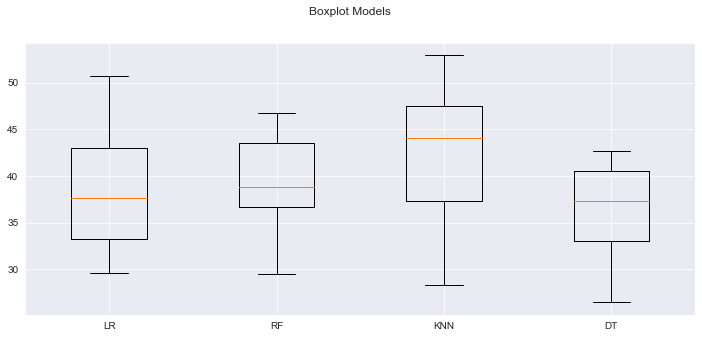

In [73]:
# Compare Algorithms
fig = plt.figure(figsize=(12,5));
fig.suptitle('Boxplot Models');
ax = fig.add_subplot(111);
plt.boxplot(results);
ax.set_xticklabels(names);

# Deployment

In [81]:
# Fit the models
final_lr   = LinearRegression();
final_lr.fit(noise[main_cols], noise['Sound']);

final_knn  = KNeighborsRegressor(n_neighbors=5);
final_knn.fit(noise[main_cols], noise['Sound']);

final_dt   = DecisionTreeRegressor(max_depth=5, random_state=RANDOM_STATE);
final_dt.fit(noise[main_cols], noise['Sound']);

final_rf   = RandomForestRegressor(max_depth=5, random_state=RANDOM_STATE);
final_rf.fit(noise[main_cols], noise['Sound']);

In [82]:
# Save model for production
dump(final_lr, 'final_lr');
dump(final_knn, 'final_knn');
dump(final_dt, 'final_dt');
dump(final_rf, 'final_dt');

# Evaluation of the mse

In [ ]:
# Load model
loaded_lr = load('final_lr');
y_lr = loaded_lr.predict(prod[main_cols]);

loaded_knn = load('final_knn');
y_knn = loaded_knn.predict(prod[main_cols]);

loaded_dt = load('final_dt');
y_dt = loaded_dt.predict(prod[main_cols]);